In [1]:
from matplotlib import pyplot as plt

import numpy as np
from scipy.stats import norm

def calc_gaussian_euclidean_distance(mean1, std_dev1, mean2, std_dev2):
    distance = np.sqrt((mean1 - mean2)**2 + (std_dev1 - std_dev2)**2)
    return distance

def calc_gaussian_kl_divergence(mean1, std_dev1, mean2, std_dev2):
    # Calculate KL divergence for each distribution
    kl_div1 = np.log(std_dev2 / std_dev1) + (std_dev1**2 + (mean1 - mean2)**2) / (2 * std_dev2**2) - 0.5
    kl_div2 = np.log(std_dev1 / std_dev2) + (std_dev2**2 + (mean2 - mean1)**2) / (2 * std_dev1**2) - 0.5

    # Calculate symmetric KL divergence (Jensen-Shannon divergence)
    symmetric_kl_divergence = 0.5 * (kl_div1 + kl_div2)

    return symmetric_kl_divergence


def plot_two_gaussian_pdfs(mean1, std_dev1, mean2, std_dev2):
    # Generate data points for x-axis
    x = np.linspace(min(mean1 - 3 * std_dev1, mean2 - 3 * std_dev2),
                    max(mean1 + 3 * std_dev1, mean2 + 3 * std_dev2), 1000)

    # Calculate the PDF for each Gaussian distribution
    pdf_values1 = norm.pdf(x, mean1, std_dev1)
    pdf_values2 = norm.pdf(x, mean2, std_dev2)

    # Plot the Gaussian distributions
    plt.plot(x, pdf_values1, label=f'Gaussian 1 (mean={mean1}, std_dev={std_dev1})')
    plt.plot(x, pdf_values2, label=f'Gaussian 2 (mean={mean2}, std_dev={std_dev2})')

    plt.title('Probability Density Functions of Two Gaussians')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

Euclidean distance:      0.1
Symmetric KL distance:   5000.000000000001


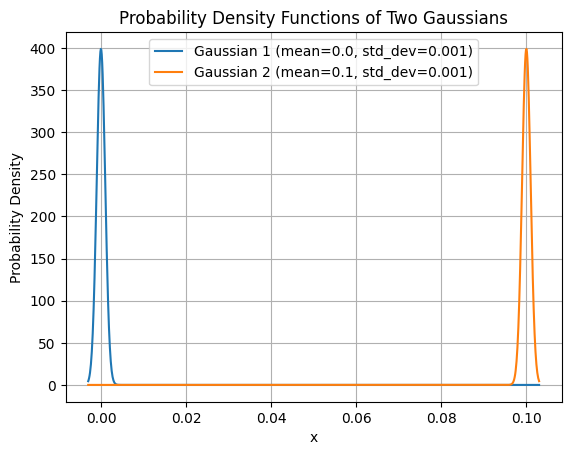

In [2]:
mu1 = 0.0
mu2 = 0.1

sigma1 = 0.001
sigma2 = 0.001

D_euclidean = calc_gaussian_euclidean_distance(mu1, sigma1, mu2, sigma2)
D_KL_sym = calc_gaussian_kl_divergence(mu1, sigma1, mu2, sigma2)

print(f"Euclidean distance:      {D_euclidean}")
print(f"Symmetric KL distance:   {D_KL_sym}")

plot_two_gaussian_pdfs(mu1, sigma1, mu2, sigma2)

Euclidean distance:      0.1
Symmetric KL distance:   50.00000000000001


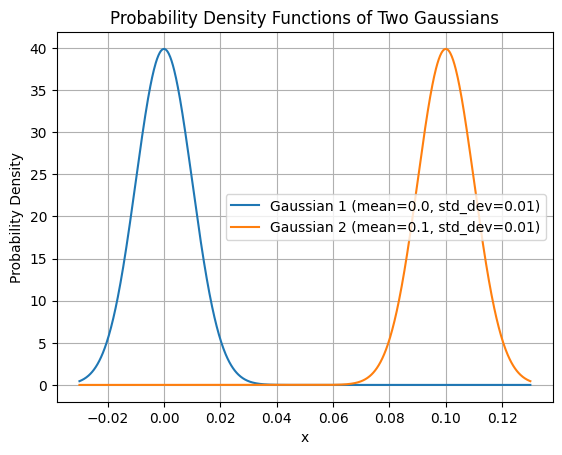

In [3]:
# Case 1
mu1 = 0.0
mu2 = 0.1

sigma1 = 0.01
sigma2 = 0.01

D_euclidean = calc_gaussian_euclidean_distance(mu1, sigma1, mu2, sigma2)
D_KL_sym = calc_gaussian_kl_divergence(mu1, sigma1, mu2, sigma2)

print(f"Euclidean distance:      {D_euclidean}")
print(f"Symmetric KL distance:   {D_KL_sym}")

plot_two_gaussian_pdfs(mu1, sigma1, mu2, sigma2)

Euclidean distance:      10.0
Symmetric KL distance:   0.0050000000000000044


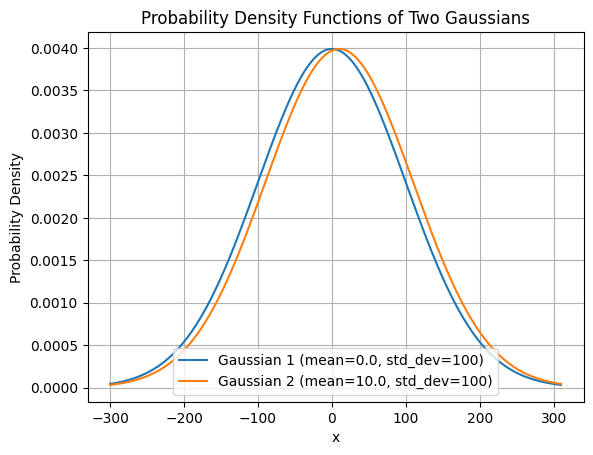

In [4]:
# Case 2
mu1 = 0.0
mu2 = 10.

sigma1 = 10**2
sigma2 = 10**2

D_euclidean = calc_gaussian_euclidean_distance(mu1, sigma1, mu2, sigma2)
D_KL_sym = calc_gaussian_kl_divergence(mu1, sigma1, mu2, sigma2)

print(f"Euclidean distance:      {D_euclidean}")
print(f"Symmetric KL distance:   {D_KL_sym}")

plot_two_gaussian_pdfs(mu1, sigma1, mu2, sigma2)